In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sample_Submission.csv to Sample_Submission.csv
Saving Train_Data.csv to Train_Data.csv
Saving Test_Data.csv to Test_Data.csv


In [ ]:
train = pd.read_csv('Train_Data.csv')
test = pd.read_csv('Test_Data.csv')
train.isnull().sum()

,0
SEQN,12
RIAGENDR,18
PAQ605,13
BMXBMI,18
LBXGLU,13
DIQ010,18
LBXGLT,11
LBXIN,9
age_group,14


In [ ]:
train.head(10)

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult
5,73581.0,1.0,2.0,23.6,110.0,2.0,100.0,6.08,Adult
6,73587.0,1.0,2.0,38.7,94.0,2.0,202.0,21.11,Adult
7,73596.0,2.0,2.0,38.3,107.0,2.0,164.0,20.93,Adult
8,73607.0,1.0,2.0,38.9,89.0,2.0,113.0,17.47,Senior
9,73610.0,1.0,1.0,28.9,90.0,2.0,95.0,3.24,Adult


In [ ]:
train['PAQ605'].describe()  #Lets start with the first feature which is encoded
print(train['PAQ605'].unique())
train['PAQ605'].value_counts(dropna=False)

[ 2.  1. nan  7.]


,count
PAQ605,
2.0,1606
1.0,346
NaN,13
7.0,1


PAQ605 is clearly binary (1=Yes, 2=No). The lone value 7 is an outlier and can be treated as NaN before imputing and fitting the model.

In [ ]:
train['PAQ605'] = train['PAQ605'].replace(7.0, np.nan)
print(train['PAQ605'].unique())

[ 2.  1. nan]


In [ ]:
test['PAQ605'].describe()  #Lets start with the first feature which is encoded
print(test['PAQ605'].unique())
test['PAQ605'].value_counts(dropna=False)

[ 1.  2. nan]


,count
PAQ605,
2.0,250
1.0,61
NaN,1


In [ ]:
nan_rows = test[test['PAQ605'].isna()]
print(nan_rows)

        SEQN  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN
216  80693.0       1.0     NaN    21.8    93.0     2.0    69.0   3.56


In [ ]:
# Get mode from training data
paq605_mode = train['PAQ605'].mode()[0]

# Fill NaN in test data
test['PAQ605'].fillna(paq605_mode, inplace=True)

In [ ]:
test['PAQ605'].value_counts(dropna=False)

,count
PAQ605,
2.0,251
1.0,61


In [ ]:
# Fill missing PAQ605 values with the mode
mode_val = train['PAQ605'].mode()[0]
train['PAQ605'].fillna(mode_val, inplace=True)

In [ ]:
train.drop('SEQN', axis=1, inplace=True)
test.drop('SEQN', axis=1, inplace=True)

In [ ]:
train['RIAGENDR'].describe()

,RIAGENDR
count,1948.000000
mean,1.510267
std,0.500023
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [ ]:
test.isnull().sum()

,0
RIAGENDR,2
PAQ605,0
BMXBMI,1
LBXGLU,1
DIQ010,1
LBXGLT,2
LBXIN,1


In [ ]:
# Get mode from train
riagendr_mode = train['RIAGENDR'].mode()[0]

# Fill missing in train and test using training mode
train['RIAGENDR'].fillna(riagendr_mode, inplace=True)
test['RIAGENDR'].fillna(riagendr_mode, inplace=True)

In [ ]:
train.isnull().sum()

,0
RIAGENDR,0
PAQ605,0
BMXBMI,18
LBXGLU,13
DIQ010,18
LBXGLT,11
LBXIN,9
age_group,14


In [ ]:
print(test['DIQ010'].unique())
test['DIQ010'].value_counts(dropna=False)

[ 2.  1. nan  3.]


,count
DIQ010,
2.0,303
3.0,7
1.0,1
NaN,1


In [ ]:
print(train['DIQ010'].unique())
train['DIQ010'].value_counts(dropna=False)

[ 2. nan  1.  3.]


,count
DIQ010,
2.0,1879
3.0,50
1.0,19
NaN,18


In [ ]:
# Fill DIQ010 NaNs with mode
diq_mode = train['DIQ010'].mode()[0]
train['DIQ010'] = train['DIQ010'].fillna(diq_mode)
test['DIQ010'] = test['DIQ010'].fillna(diq_mode)

In [ ]:
train = train.dropna(subset=['age_group'])

In [ ]:
train.isnull().sum()

,0
RIAGENDR,0
PAQ605,0
BMXBMI,18
LBXGLU,13
DIQ010,0
LBXGLT,11
LBXIN,9
age_group,0


In [ ]:
test.isnull().sum()

,0
RIAGENDR,0
PAQ605,0
BMXBMI,1
LBXGLU,1
DIQ010,0
LBXGLT,2
LBXIN,1


In [ ]:
from sklearn.impute import SimpleImputer

num_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

# Impute numerical features with median
num_imputer = SimpleImputer(strategy='median')
train[num_cols] = num_imputer.fit_transform(train[num_cols])
test[num_cols] = num_imputer.transform(test[num_cols])

In [ ]:
train.head()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15,Adult
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [ ]:
# Columns to convert
cols_to_convert = ['RIAGENDR', 'PAQ605', 'DIQ010']  # Add more if needed

# Apply the conversion
for col in cols_to_convert:
    train[col] = train[col].replace({1.0: 0, 2.0: 1})
    test[col] = test[col].replace({1.0: 0, 2.0: 1})

In [ ]:
def advanced_feature_engineering(df):
    df = df.copy()

    # 1. First check if target column exists
    target_present = 'age_group' in df.columns

    # 2. Demographic Features
    if 'RIAGENDR' in df.columns:
        df['Is_Female'] = (df['RIAGENDR'] == 2).astype(int)

    # 3. Activity Features
    if 'PAQ605' in df.columns:
        df['Is_Active'] = (df['PAQ605'] == 1).astype(int)

    # 4. BMI Features
    if 'BMXBMI' in df.columns:
        df['BMI_Class'] = pd.cut(df['BMXBMI'],
                               bins=[0, 18.5, 25, 30, 35, 40, float('inf')],
                               labels=[0, 1, 2, 3, 4, 5])
        df['BMI_Squared'] = df['BMXBMI'] ** 2

    # 5. Glucose Features
    if 'LBXGLU' in df.columns:
        df['Glucose_Status'] = pd.cut(df['LBXGLU'],
                                    bins=[0, 70, 99, 125, 200, float('inf')],
                                    labels=[0, 1, 2, 3, 4])

    # 6. Glucose Tolerance if both columns exist
    if all(col in df.columns for col in ['LBXGLT', 'LBXGLU']):
        df['Glucose_Tolerance'] = df['LBXGLT'] - df['LBXGLU']

    # 7. Insulin Resistance Features
    if all(col in df.columns for col in ['LBXGLU', 'LBXIN']):
        # Handle zero/negative insulin values
        df['LBXIN_adj'] = df['LBXIN'].clip(lower=0.1)
        df['HOMA_IR'] = (df['LBXGLU'] * df['LBXIN_adj']) / 405
        df['QUICKI'] = 1 / (np.log(df['LBXIN_adj']) + np.log(df['LBXGLU']))
        df.drop('LBXIN_adj', axis=1, inplace=True)

    # 8. Diabetes Risk Features
    if 'DIQ010' in df.columns and 'LBXGLU' in df.columns:
        df['Diabetes_Risk'] = df['DIQ010'].replace({1: 2, 2: 0, 3: 1}) * df['LBXGLU']/100

    # 9. Metabolic Syndrome Features
    metabolic_features = []
    if 'BMXBMI' in df.columns:
        df['Abdominal_Obesity'] = (df['BMXBMI'] > 30).astype(int)
        metabolic_features.append('Abdominal_Obesity')
    if 'LBXGLU' in df.columns:
        df['Fasting_Hyperglycemia'] = (df['LBXGLU'] > 100).astype(int)
        metabolic_features.append('Fasting_Hyperglycemia')
    if 'LBXIN' in df.columns:
        median_insulin = df['LBXIN'].median()
        df['Hyperinsulinemia'] = (df['LBXIN'] > median_insulin).astype(int)
        metabolic_features.append('Hyperinsulinemia')

    if metabolic_features:
        df['Metabolic_Score'] = df[metabolic_features].sum(axis=1)

    # 10. Interaction Features
    if 'Is_Female' in df.columns and 'BMXBMI' in df.columns:
        df['Female_Obesity_Risk'] = df['Is_Female'] * (df['BMXBMI'] > 30)

    if 'Is_Active' in df.columns and 'LBXGLU' in df.columns:
        df['Inactive_HighGlucose'] = ((df['Is_Active'] == 0) & (df['LBXGLU'] > 125)).astype(int)

    # 11. Only encode target if it exists
    if target_present:
        df['age_group_encoded'] = df['age_group'].map({'Adult': 0, 'Senior': 1})

    return df

In [ ]:
test = advanced_feature_engineering(test)
train = advanced_feature_engineering(train)

In [ ]:
train.head()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group,Is_Female,Is_Active,...,HOMA_IR,QUICKI,Diabetes_Risk,Abdominal_Obesity,Fasting_Hyperglycemia,Hyperinsulinemia,Metabolic_Score,Female_Obesity_Risk,Inactive_HighGlucose,age_group_encoded
0,1.0,1.0,35.7,110.0,1.0,150.0,14.91,Adult,0,1,...,4.049630,0.135089,2.20,1,1,1,3,0,0,0
1,1.0,1.0,20.3,89.0,1.0,80.0,3.85,Adult,0,1,...,0.846049,0.171329,1.78,0,0,0,0,0,0,0
2,0.0,1.0,23.2,89.0,1.0,68.0,6.14,Adult,0,1,...,1.349284,0.158643,1.78,0,0,0,0,0,0,0
3,0.0,1.0,28.9,104.0,1.0,84.0,16.15,Adult,0,1,...,4.147160,0.134656,2.08,0,1,1,2,0,0,0
4,1.0,0.0,35.9,103.0,1.0,81.0,10.92,Adult,0,0,...,2.777185,0.142342,2.06,1,1,1,3,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, 0 to 1965
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   RIAGENDR               1952 non-null   float64 
 1   PAQ605                 1952 non-null   float64 
 2   BMXBMI                 1952 non-null   float64 
 3   LBXGLU                 1952 non-null   float64 
 4   DIQ010                 1952 non-null   float64 
 5   LBXGLT                 1952 non-null   float64 
 6   LBXIN                  1952 non-null   float64 
 7   age_group              1952 non-null   object  
 8   Is_Female              1952 non-null   int64   
 9   Is_Active              1952 non-null   int64   
 10  BMI_Class              1952 non-null   category
 11  BMI_Squared            1952 non-null   float64 
 12  Glucose_Status         1952 non-null   category
 13  Glucose_Tolerance      1952 non-null   float64 
 14  HOMA_IR                1952 non-null   float6

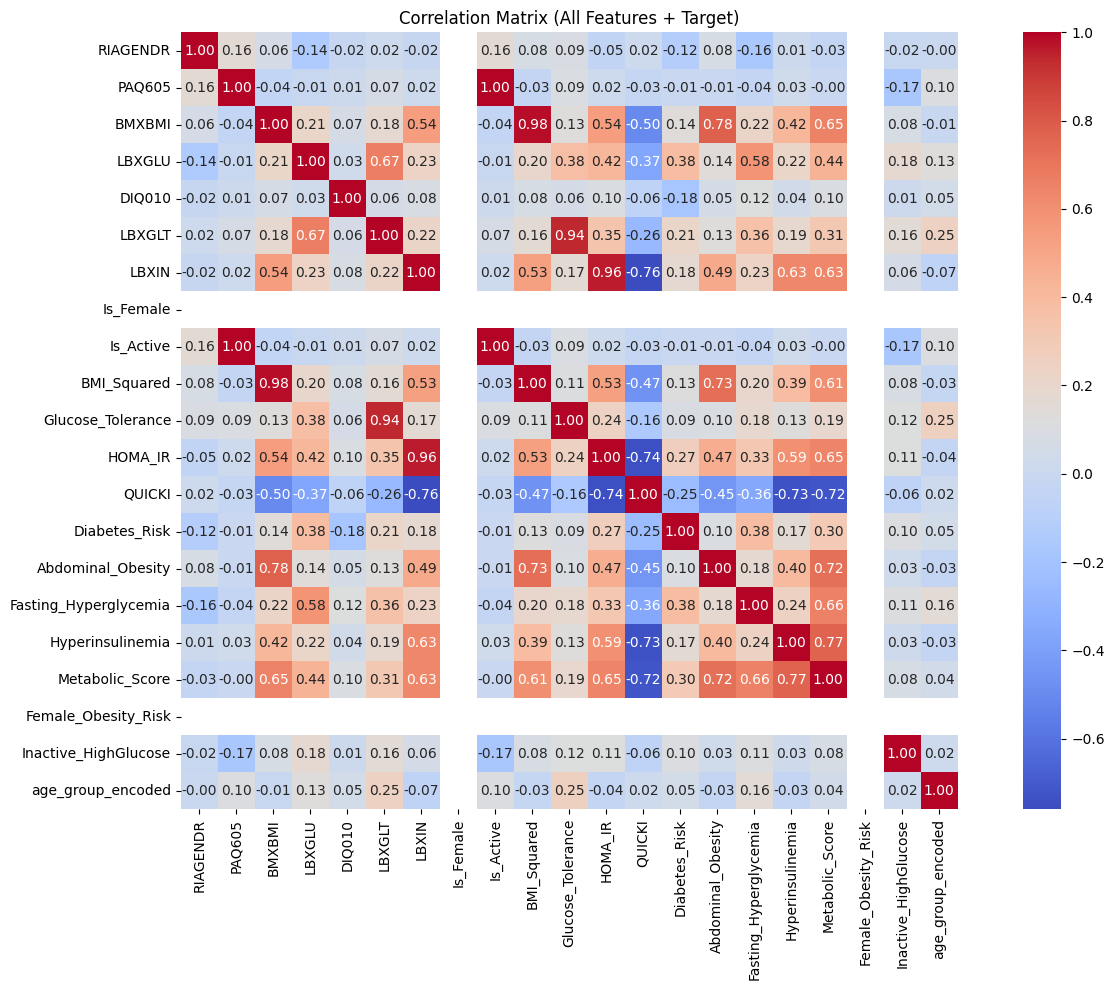

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = train.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix (All Features + Target)")
plt.tight_layout()
plt.show()


In [ ]:
!pip install optuna

In [ ]:
pip install optuna scikit-learn xgboost


In [ ]:
import optuna
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, train_test_split

In [ ]:
pip install optuna-integration[sklearn]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 3.8 MB/s eta 0:00:00


In [ ]:
train.head()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group,Is_Female,Is_Active,...,HOMA_IR,QUICKI,Diabetes_Risk,Abdominal_Obesity,Fasting_Hyperglycemia,Hyperinsulinemia,Metabolic_Score,Female_Obesity_Risk,Inactive_HighGlucose,age_group_encoded
0,1.0,1.0,35.7,110.0,1.0,150.0,14.91,Adult,0,1,...,4.049630,0.135089,2.20,1,1,1,3,0,0,0
1,1.0,1.0,20.3,89.0,1.0,80.0,3.85,Adult,0,1,...,0.846049,0.171329,1.78,0,0,0,0,0,0,0
2,0.0,1.0,23.2,89.0,1.0,68.0,6.14,Adult,0,1,...,1.349284,0.158643,1.78,0,0,0,0,0,0,0
3,0.0,1.0,28.9,104.0,1.0,84.0,16.15,Adult,0,1,...,4.147160,0.134656,2.08,0,1,1,2,0,0,0
4,1.0,0.0,35.9,103.0,1.0,81.0,10.92,Adult,0,0,...,2.777185,0.142342,2.06,1,1,1,3,0,0,0


In [ ]:
from os.path import sameopenfile
import optuna
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

# Final columns to drop from both train and test
common_cols_to_drop = [
    "BMI_Squared",
    "LBXIN",
    "QUICKI",
    "LBXGLU",
    "LBXGLT",
    "RIAGENDR",
    "PAQ605",
    "DIQ010",
    "Inactive_HighGlucose",
    "age_group",  # raw label
]

common_cols_to_drop_2 = [
    "BMI_Squared",
    "LBXIN",
    "QUICKI",
    "LBXGLU",
    "LBXGLT",
    "RIAGENDR",
    "PAQ605",
    "DIQ010",
    "Inactive_HighGlucose",
]

# For train: also drop the target from X
X = train.drop(columns=common_cols_to_drop + ["age_group_encoded"])
y = train["age_group_encoded"]

# For test: drop the same columns (excluding age_group_encoded if it's not present)
X_test = test.drop(columns=common_cols_to_drop_2 )


X['BMI_Class'] = X['BMI_Class'].astype(int)
X['Glucose_Status'] = X['Glucose_Status'].astype(int)

def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'tree_method': 'hist',
        'lambda': trial.suggest_float('lambda', 1e-4, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-4, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 5),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 200),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in cv.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = XGBClassifier(**params, random_state=42 ,enable_categorical=True)
        model.fit(X_tr, y_tr)  # ❌ No early stopping

        preds = model.predict(X_val)
        f1_scores.append(f1_score(y_val, preds))

    return np.mean(f1_scores)

# Run optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Train final model on all data
best_params = study.best_params
best_params.update({
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'tree_method': 'hist',
    'random_state': 42
})

final_model = XGBClassifier(**best_params)
final_model.fit(X, y)

# Predict on test data
test_preds = final_model.predict(X_test)

# Create submission
sample_submission = pd.read_csv('Sample_Submission.csv')
sample_submission['age_group'] = test_preds
sample_submission.to_csv("submission_xgb_optuna.csv", index=False)

# Output best results
print(f"\nBest validation F1: {study.best_value:.4f}")
print(f"Best parameters: {best_params}")


[I 2025-06-24 14:54:43,761] A new study created in memory with name: no-name-3af462f3-bc1b-4d7e-a69c-404025a189a2
[I 2025-06-24 14:54:46,959] Trial 0 finished with value: 0.2520510366099171 and parameters: {'lambda': 0.014934858567038889, 'alpha': 0.02724242536837617, 'max_depth': 5, 'eta': 0.07406573356117092, 'gamma': 0.10790500768524394, 'colsample_bytree': 0.9210811841841171, 'min_child_weight': 5, 'subsample': 0.7231790581983631, 'n_estimators': 118}. Best is trial 0 with value: 0.2520510366099171.
[I 2025-06-24 14:54:49,492] Trial 1 finished with value: 0.25418103203049436 and parameters: {'lambda': 0.020184920163133724, 'alpha': 0.02185585036448485, 'max_depth': 3, 'eta': 0.20304237039806577, 'gamma': 0.7585358959645234, 'colsample_bytree': 0.6720886635174969, 'min_child_weight': 6, 'subsample': 0.7415603075934257, 'n_estimators': 108}. Best is trial 1 with value: 0.25418103203049436.
[I 2025-06-24 14:54:49,862] Trial 2 finished with value: 0.21818616376722821 and parameters: {'


Best validation F1: 0.2958
Best parameters: {'lambda': 0.02444278723597034, 'alpha': 0.00046747155021931755, 'max_depth': 5, 'eta': 0.20956314099894868, 'gamma': 0.32941293268960165, 'colsample_bytree': 0.7050547937768472, 'min_child_weight': 1, 'subsample': 0.800487618458913, 'n_estimators': 194, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'tree_method': 'hist', 'random_state': 42}


In [ ]:
from google.colab import files
files.download('submission_xgb_optuna.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>